In [24]:
import pandas as pd
from bs4 import BeautifulSoup # html etiketlerini kaldırmak için

In [40]:
df=pd.read_csv("IMDB Dataset.csv")

In [41]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [42]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [43]:
def clear(text):   
    text=text.lower()             
    soup = BeautifulSoup(text)          
    text=text.replace("[^\w\s]","")
    text=text.replace("\d+","") 
    text=text.replace("\n"," ").replace("\r","") 
    text=text.replace('""',"") 
    text = soup.get_text()
    return text

In [44]:
df["review"]=df['review'].apply(clear)

In [45]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [48]:
x=df.review
y=df.sentiment

In [50]:
from textblob import TextBlob

In [51]:
def detect_sentiment(text):
  return TextBlob(text).sentiment.polarity

In [52]:
df["polarity"]=df["review"].apply(detect_sentiment)

In [53]:
df.polarity.value_counts()

 0.150000    42
 0.250000    39
 0.300000    36
 0.500000    34
 0.000000    31
             ..
 0.009375     1
 0.341293     1
 0.174282     1
 0.222044     1
-0.048663     1
Name: polarity, Length: 43206, dtype: int64

In [57]:
from nltk.stem.snowball import SnowballStemmer

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=80)

In [72]:
vect=CountVectorizer(lowercase=True,stop_words='english',ngram_range=(1,2))
x_train_new=vect.fit_transform(x_train,y_train)
x_test_new=vect.fit_transform(x_test)

In [76]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def classify_text(text, x, y):
    vectorizer = CountVectorizer(lowercase=False, max_features=300)
    bag_of_words = vectorizer.fit_transform(text[x])
    
    x_train, x_test, y_train, y_test = train_test_split(bag_of_words,  
                                                        text[y],random_state=13)
    
    reg = LogisticRegression(max_iter=1e4)
    reg.fit(x_train, y_train)
    acc = reg.score(x_test, y_test)
    return acc

print(classify_text(df, 'review', 'sentiment'))

0.80288


In [80]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [78]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open("cloud.png"))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis("off")

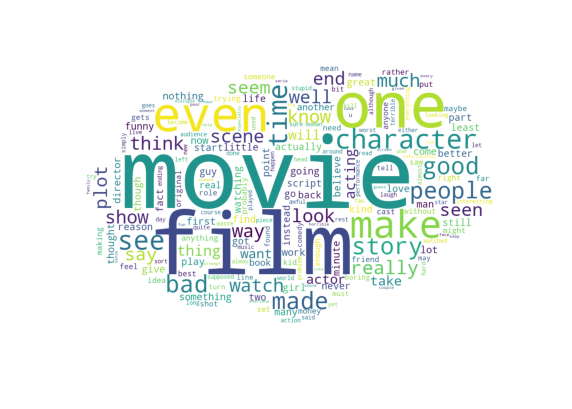

In [81]:
wc(df[df['sentiment']=="negative"]['review'],'white')

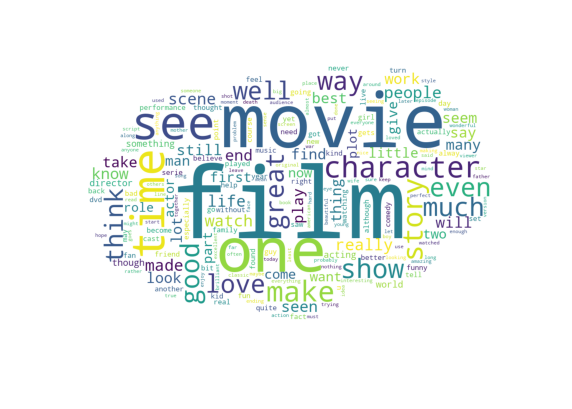

In [82]:
wc(df[df['sentiment']=="positive"]['review'],'white')